<a href="https://colab.research.google.com/github/Rahul-tech-hub/CreditCardFraudDtetction/blob/main/Copy_of_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [48]:
#load dataset
creditcard = pd.read_csv('/content/creditcard.csv')

In [49]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28183.123562,-0.240703,0.021469,0.694689,0.191074,-0.249837,0.102310,-0.119867,0.053450,0.141204,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.722320,1.884794,1.626518,1.519894,1.402196,1.412854,1.309931,1.282101,1.216930,1.214104,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990001,-0.548684,0.220594,-0.714455,-0.857297,-0.636473,-0.602224,-0.146950,-0.597975,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32930.500000,-0.248789,0.085468,0.800243,0.195142,-0.282244,-0.152017,-0.074952,0.057092,0.026153,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38236.000000,1.156434,0.736933,1.432158,1.070576,0.286638,0.492728,0.425886,0.329612,0.837269,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [50]:
#first 5 rows of dataset
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [51]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0
47627,43282,1.121749,-0.208202,0.660816,0.857988,-0.823614,-0.422509,-0.286708,0.098616,0.541126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [53]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [54]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

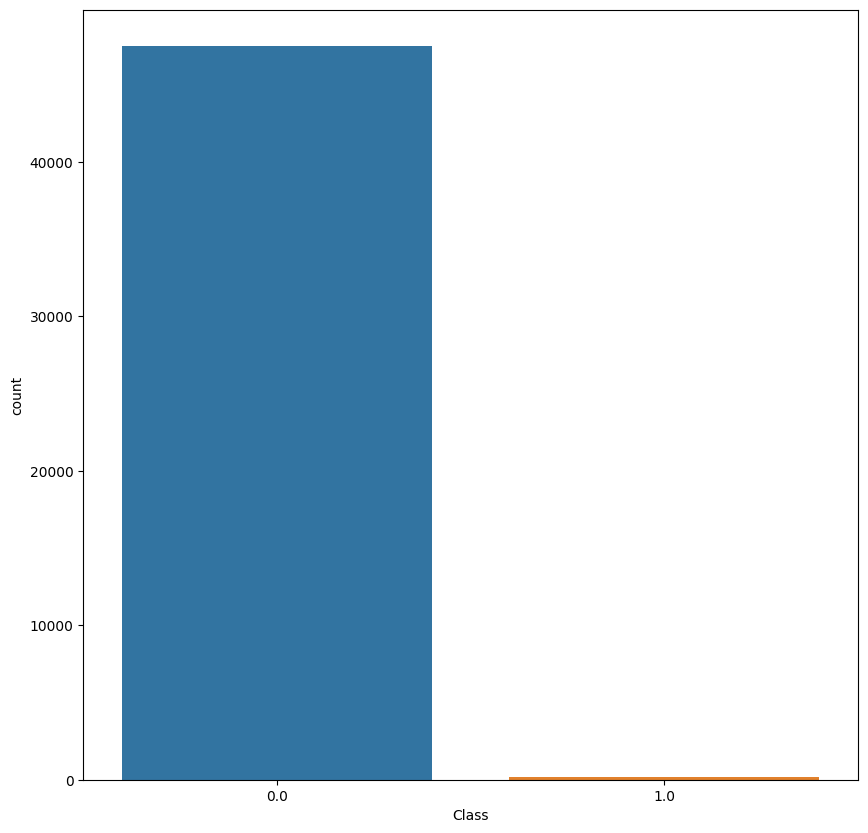

In [55]:
countplot_data(creditcard, creditcard.Class)

### What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.
- We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 8000.


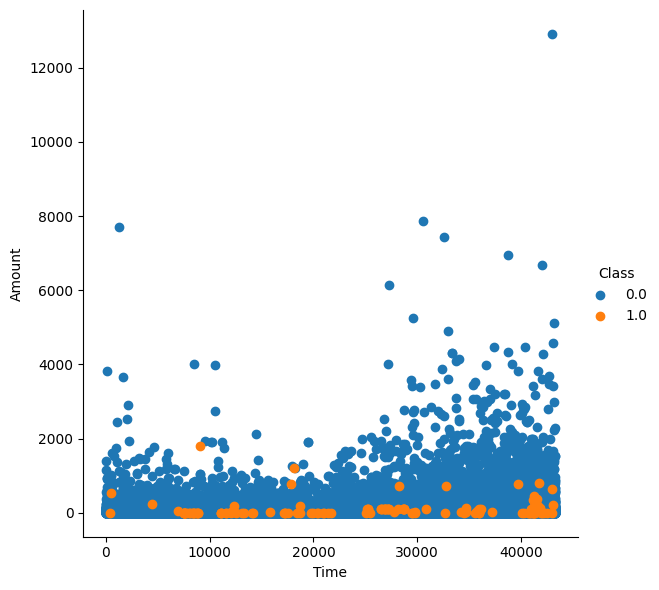

In [56]:
pairplot_data_grid(creditcard, "Time", "Amount", "Class")

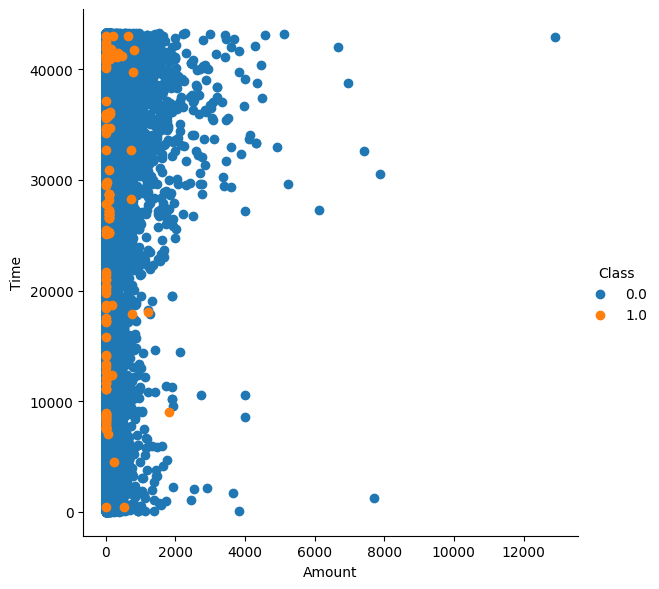

In [57]:
pairplot_data_grid(creditcard, "Amount", "Time", "Class")

In [58]:
amount_more = 0
amount_less = 0
for i in range(creditcard.shape[0]):
    if(creditcard.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

86
47542


In [59]:
percentage_less = (amount_less/creditcard.shape[0])*100
percentage_less

99.81943394641807

In [60]:
fraud = 0
legitimate = 1
for i in range(creditcard.shape[0]):
    if(creditcard.iloc[i]["Amount"]<2500):
        if(creditcard.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

146
47397


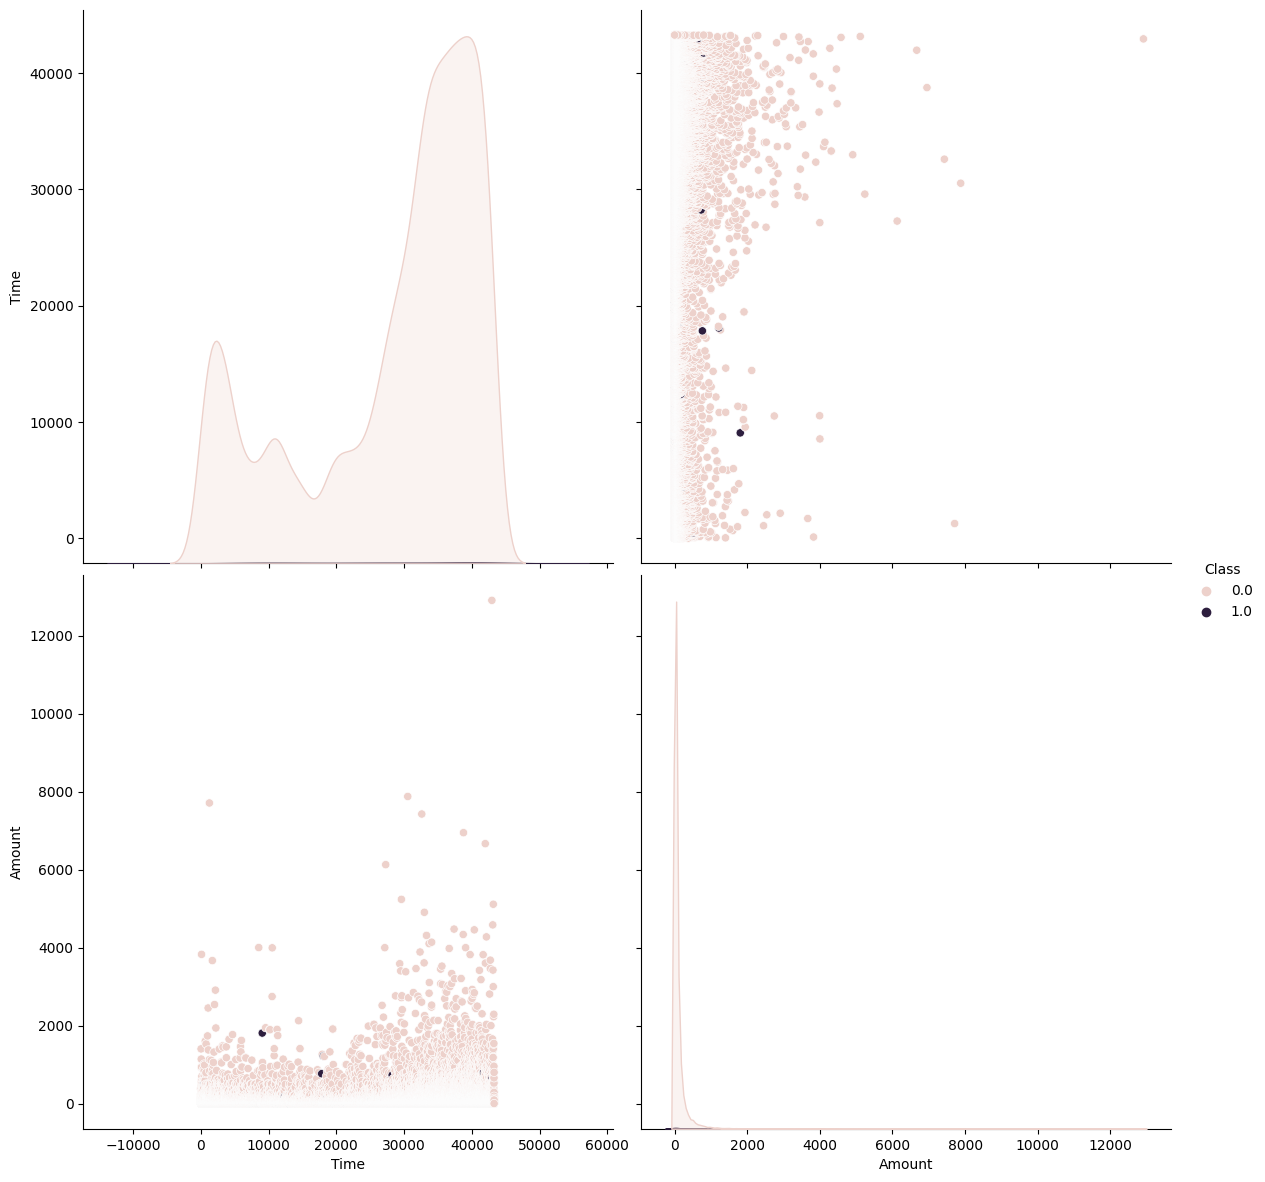

In [61]:

creditcard = creditcard[["Time", "Amount", "Class"]]
sns.pairplot(creditcard, hue="Class", size=6)
plt.show()

In [62]:
#Distribition of legit transaction and fraudulent transactions
creditcard['Class'].value_counts()


0.0    47481
1.0      146
Name: Class, dtype: int64

This Datset is higly Unbalanced

label o represents Normal Transaction

label 1 represents Fradulent Transaction


### What is the relationship between Time and Transactions?


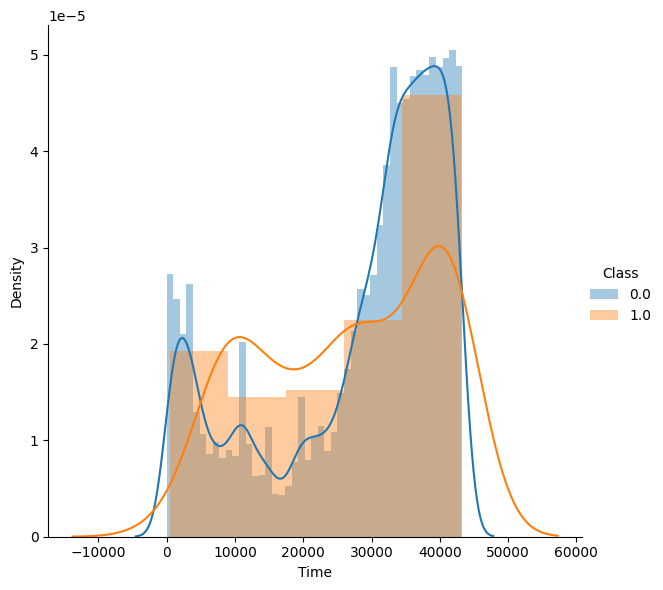

In [63]:
sns.FacetGrid(creditcard, hue="Class", height=6).map(sns.distplot,"Time").add_legend()
plt.show()

In [64]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(
    creditcard['Amount'].values.reshape(-1, 1))

creditcard['scaled_time'] = rob_scaler.fit_transform(
    creditcard['Time'].values.reshape(-1, 1))

creditcard.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
creditcard.head()

,Class,scaled_amount,scaled_time
0,0.0,1.650291,-1.858485
1,0.0,-0.295286,-1.858485
2,0.0,4.683130,-1.858429
3,0.0,1.304423,-1.858429
4,0.0,0.595869,-1.858372


In [105]:
X= new_dataset.drop(columns ='Class', axis = 1)
Y = new_dataset['Class']

Feature Scaling:

In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply PCA

In [107]:
n_components = 2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Explained Variance Ratio

In [108]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.51629589 0.48370411]


Choosing the Number of Components

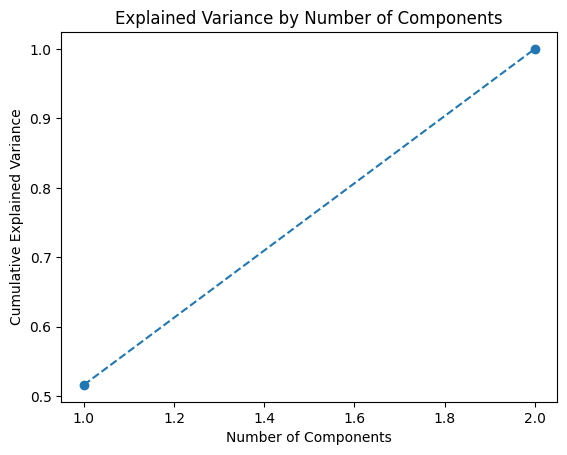

In [109]:
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance to help decide the number of components
plt.figure()
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

In [110]:
#separating data for analysis
legit = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class == 1]

In [111]:
print(legit.shape)
print(fraud.shape)

(47481, 3)
(146, 3)


In [112]:
#statistical measures
legit.describe()

,Class,scaled_amount,scaled_time
count,47481.0,47481.000000,47481.000000
mean,0.0,0.883998,-0.267678
std,0.0,3.308586,0.733789
min,0.0,-0.330906,-1.858485
25%,0.0,-0.230270,-0.698487
50%,0.0,0.000000,0.000367
75%,0.0,0.768141,0.299199
max,0.0,170.629502,0.584203


In [113]:
fraud.describe()

,Class,scaled_amount,scaled_time
count,146.0,146.000000,146.000000
mean,1.0,1.003437,-0.354427
std,0.0,3.109973,0.724845
min,1.0,-0.330906,-1.835572
25%,1.0,-0.317664,-1.063138
50%,1.0,-0.220074,-0.305463
75%,1.0,0.993114,0.450420
max,1.0,23.632018,0.569869


In [114]:
#compare the value for both transactions
creditcard.groupby('Class').mean()

,scaled_amount,scaled_time
Class,,
0.0,0.883998,-0.267678
1.0,1.003437,-0.354427


In [115]:
legit_sample = legit.sample(n=3)

concatening two dataframes


In [116]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [117]:
new_dataset.head()

,Class,scaled_amount,scaled_time
10090,0.0,-0.300318,-0.993651
42610,0.0,1.059454,0.465009
21523,0.0,2.237950,-0.068316
541,1.0,-0.330906,-1.835572
623,1.0,6.673861,-1.831847


In [118]:
new_dataset.tail()

,Class,scaled_amount,scaled_time
45203,1.0,-0.317664,0.525792
45732,1.0,-0.317664,0.538603
46909,1.0,-0.317664,0.567442
46918,1.0,8.249603,0.567611
46998,1.0,2.373941,0.569869


In [119]:
new_dataset['Class'].value_counts()

1.0    146
0.0      3
Name: Class, dtype: int64

In [120]:
new_dataset.groupby('Class').mean()

,scaled_amount,scaled_time
Class,,
0.0,0.999029,-0.198986
1.0,1.003437,-0.354427


splitting the data into features & Targets

In [121]:
X= new_dataset.drop(columns ='Class', axis = 1)
Y = new_dataset['Class']

In [122]:
print(X)

       scaled_amount  scaled_time
10090      -0.300318    -0.993651
42610       1.059454     0.465009
21523       2.237950    -0.068316
541        -0.330906    -1.835572
623         6.673861    -1.831847
...              ...          ...
45203      -0.317664     0.525792
45732      -0.317664     0.538603
46909      -0.317664     0.567442
46918       8.249603     0.567611
46998       2.373941     0.569869

[149 rows x 2 columns]


In [123]:
print(Y)

10090    0.0
42610    0.0
21523    0.0
541      1.0
623      1.0
        ... 
45203    1.0
45732    1.0
46909    1.0
46918    1.0
46998    1.0
Name: Class, Length: 149, dtype: float64


In [124]:
train_x, test_x, train_Y,test_Y = train_test_split(X, Y, test_size= .3, random_state = 123)

In [125]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (104, 2)
X Test size:  (45, 2)
X Test proportion  30%


In [126]:
print('Y Train size: ', train_Y.shape)
print('Y Test size: ', test_Y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_Y) / (len(train_Y) + len(test_Y))) * 100))

Y Train size:  (104,)
Y Test size:  (45,)
Y Test proportion  30%


In [127]:
Y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

1.0    146
0.0      3
Name: Class, dtype: int64

## Applying Classifiers

In [132]:
# Applying Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_Y)

Y_predictions_rf = random_forest.predict(test_x)

# Applying Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_Y)

Y_predictions_dt = decision_tree.predict(test_x)

# Applying Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_Y)

Y_predictions_ab = ada_boost.predict(test_x)

# Applying Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_Y)

Y_prediction_gb = gradient_boosting.predict(test_x)

In [191]:
# Printing Evaluation Metrics for Random Forest
metrics_rf = [['Accuracy',(accuracy_score(test_Y, Y_predictions_dt))],
                         ['Precision',precision_score(test_Y, Y_predictions_rf)],
                         ['Recall', recall_score(test_Y, Y_predictions_rf)],
                         ['F1_score',f1_score(test_Y, Y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics_rf, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.911111
1,Precision,0.977273
2,Recall,0.977273
3,F1_score,0.977273


In [193]:
metrics_rf = (accuracy_score(test_Y, Y_predictions_dt))
metrics_rf

0.9111111111111111

In [194]:
print('Accuracy on training data:' , metrics_rf)

Accuracy on training data: 0.9111111111111111


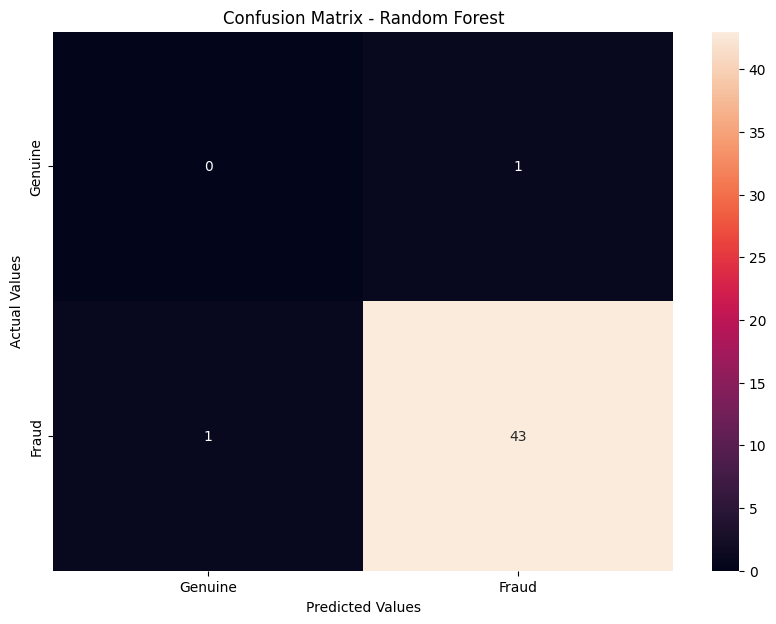

In [135]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_Y, Y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Decision Tree Scores

In [136]:
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(test_Y, Y_predictions_dt))],
                         ['Precision',precision_score(test_Y, Y_predictions_dt)],
                         ['Recall', recall_score(test_Y, Y_predictions_dt)],
                         ['F1_score',f1_score(test_Y, Y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,0.911111
1,Precision,0.976190
2,Recall,0.931818
3,F1_score,0.953488


In [183]:
# Printing Accuracy for Decision Tree
metrics_df = (accuracy_score(test_Y, Y_predictions_dt))

metrics_df


0.9111111111111111

In [184]:
print('Accuracy on training data:' , metrics_df)

Accuracy on training data: 0.9111111111111111


Resultant Accuracy For Decision Tree

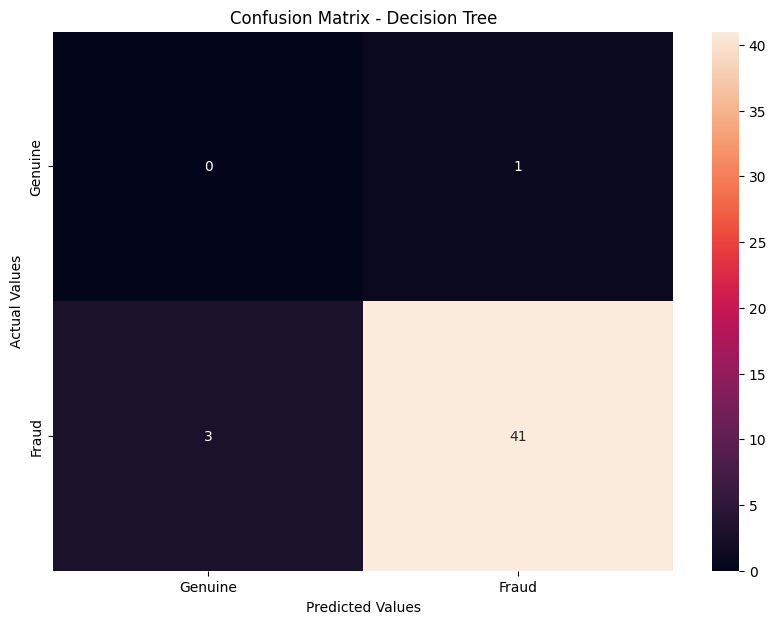

In [137]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(test_Y, Y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [138]:
# Printing Evaluation Metrics for Gradient Boosting
metrics_gb = [['Accuracy',(accuracy_score(test_Y, Y_prediction_gb))],
                         ['Precision',precision_score(test_Y, Y_prediction_gb)],
                         ['Recall', recall_score(test_Y, Y_prediction_gb)],
                         ['F1_score',f1_score(test_Y, Y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results'])
metrics_df_gb

,Metrics,Results
0,Accuracy,0.933333
1,Precision,0.976744
2,Recall,0.954545
3,F1_score,0.965517


In [186]:
metrics_gb = [(accuracy_score(test_Y, Y_prediction_gb))]
metrics_gb

[0.9333333333333333]

In [187]:
print('Accuracy on training data:' , metrics_gb)

Accuracy on training data: [0.9333333333333333]


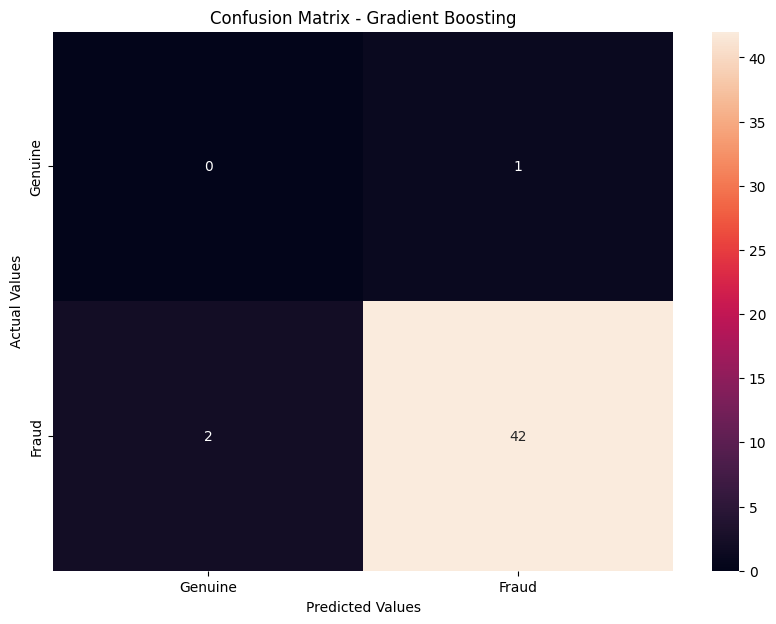

In [139]:
# Confusion Matrix for Gradient Boosting
confusion_matrix_gb = confusion_matrix(test_Y, Y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [140]:
# Counting how many fraudulent and how many genuine transactions we have on the testing set
test_Y.value_counts()

1.0    44
0.0     1
Name: Class, dtype: int64

In [162]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_Y, Y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  48.86
Decision Tree ROC AUC Score:  46.59
Ada Boost ROC AUC Score:  47.73
Gradient Boost ROC AUC Score:  47.73


split the data into training data and testing data

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=  1)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(149, 2) (119, 2) (30, 2)


model training
Logistic Regresion

In [152]:
model = LogisticRegression()

In [153]:
#training the logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Store


In [154]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [155]:
print('Accuracy on training data:' , training_data_accuracy)

Accuracy on training data: 0.9831932773109243


In [156]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [157]:
print('Accuracy on testing data:' , test_data_accuracy)

Accuracy on testing data: 0.9666666666666667


Accuracy of all Models in single table:

In [210]:
model_names = ['Random Forest','Decison Tree','Gradient Boosting','Logistic Regression']

accuracy_scores = [0.9111, 0.9111, 0.9333, 0.9888]

data = {
    'Model': model_names,
    'Accuracy': accuracy_scores
}

accuracy_table = pd.DataFrame(data)
accuracy_table

,Model,Accuracy
0,Random Forest,0.9111
1,Decison Tree,0.9111
2,Gradient Boosting,0.9333
3,Logistic Regression,0.9888


Plotted Graph on the basis of accuracy of models:

                 Model  Accuracy
0        Random Forest    0.9111
1         Decison Tree    0.9111
2    Gradient Boosting    0.9333
3  Logistic Regression    0.9888


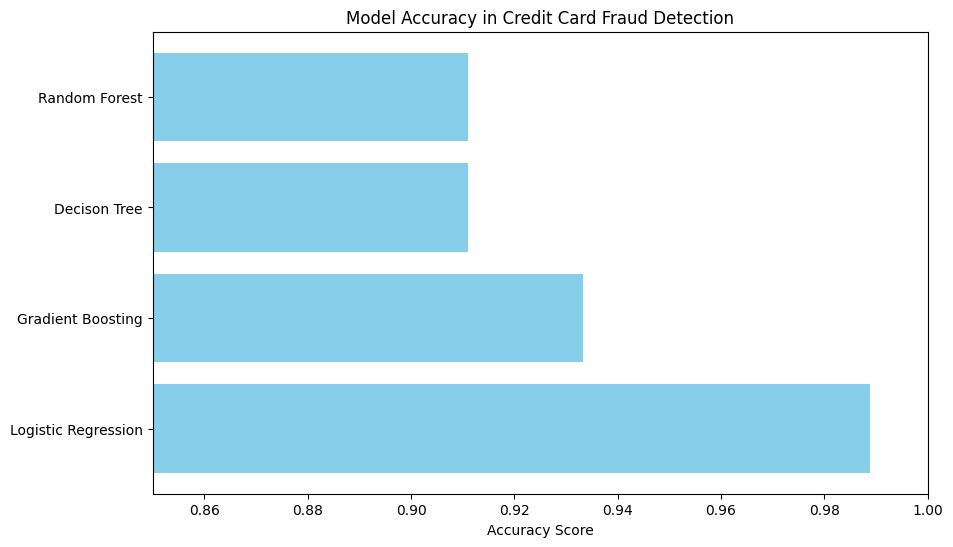

In [211]:
# Display the accuracy table
print(accuracy_table)
plt.figure(figsize=(10, 6))
plt.barh(accuracy_table['Model'], accuracy_table['Accuracy'], color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy in Credit Card Fraud Detection')
plt.xlim(0.85, 1.0)  # Adjust the x-axis limits as needed
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest accuracy at the top

plt.show()